In [3]:
# importing relevant packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
# reading in the data (2020 Collection Year Incident-Level Extract File)
data = pd.read_csv("38090-0005-Data.tsv",sep='\t')

In [5]:
# using as many features as possible to perform boosting using GradientBoostingClassifier

In [6]:
data2 = pd.get_dummies(data, columns=['V2143','V2036','V2020','V3071','V2125','V4025','V4049',
                                      'V4127','V4184','V4234','V4235','V4484','V4524','V4525','V4526AA','V2026','V4017',
                                      'V2034','V2040A','V2047','V2132','V3024','V3046','V3058','V3074','YEARQ','V4048',
                                      'V4095','V4051','V4052','V4053','V4054','V4055','V4056','V4057','V4060','V4062',
                                      'V4064','V4066','V4067','V4068','V4070','V4071','V4072','V4073','V4075',
                                     'V4078','V4080','V4081','V4082','V4083','V4084','V4085','V4086','V4087','V4088',
                                      'V4089','V4090','V4091','V4094','V4096','V4097','V4098','V4099','V4100',
                                      'V4101','V4102','V4103','V4104','V4105','V4106','V4107','V4124','V4529'])

feature_names = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2','V2020_1','V2020_2','V2020_3','V2020_4','V2020_5'
                ,'V2020_6','V2020_7','V2020_8','V2020_11','V2020_12','V3071_1','V3071_2','V2125_1','V2125_2','V4025_1',
                 'V4025_2','V4049_1','V4049_2','V4127_1','V4127_2','V4184_1','V4184_2','V4234_1','V4234_2','V4235_1',
                 'V4235_2','V4484_1','V4484_2','V4524_1','V4524_2','V4525_1','V4525_2','V4526AA_1','V4526AA_2',
                 'V4526AA_3','V2026_1','V2026_2','V2026_3','V2026_4','V2026_5','V2026_6','V2026_7','V2026_8','V2026_9',
                 'V2026_10','V2026_11','V2026_12','V2026_13','V2026_15','V2026_16','V2026_17','V2026_18','V2033','V2071',
                 'V2072','V4016','V4364','V4017_1','V4017_2','V2034_1','V2034_2','V2034_3','V2034_4','V2034_5','V2040A_1',
                'V2040A_5','V2040A_3','V2040A_4','V2040A_2','V2040A_6','V2040A_7','V2040A_8','V2040A_10','V2040A_15',
                 'V2040A_11','V2040A_14','V2040A_19','V2040A_16','V2040A_12','V2040A_18','V2040A_17','V2040A_13',
                 'V2040A_9','V2040A_20','V2047_42','V2047_41','V2047_10','V2047_28','V2047_27','V2047_43','V2047_44',
                 'V2047_11','V2047_40','V2047_9','V2047_45','V2047_7','V2047_8','V2047_0','V2047_6','V2047_3','V2047_2',
                 'V2047_1','V2047_4','V2047_5','V2132_4','V2132_1','V2132_2','V2132_3','V2132_0','V3024_1','V3024_2','V3046_2',
                 'V3046_1','V3046_3','V3058_1','V3058_2','V3074_11','V3074_12','V3074_27','V3074_2','V3074_8','V3074_9',
                'V3074_16','V3074_3','V3074_10','V3074_17','V3074_14','V3074_18','V3074_6','V3074_1','V3074_20','V3074_5',
                'V3074_22','V3074_24','V3074_21','V3074_25','V3074_13','YEARQ_2020.1','YEARQ_2020.2','YEARQ_2020.3',
                 'YEARQ_2020.4','V4048_1','V4048_2','V4095_0','V4095_1','V4051_0','V4051_1','V4052_0','V4052_1','V4053_0',
                'V4053_1','V4054_0','V4054_1','V4055_0','V4055_1','V4056_0','V4056_1','V4057_0','V4057_1','V4060_1',
                 'V4060_2','V4062_1','V4062_2','V4064_1','V4064_2','V4066_0','V4066_1','V4067_0','V4067_1','V4068_0','V4068_1',
                 'V4070_0','V4070_1','V4071_0','V4071_1','V4072_0','V4072_1','V4073_0','V4073_1','V4075_0','V4075_1','V4078_0',
                 'V4078_1','V4080_0', 'V4080_1','V4081_0','V4081_1','V4082_0','V4082_1','V4083_0','V4083_1','V4084_0','V4084_1',
                 'V4085_0','V4085_1','V4086_0','V4086_1','V4087_0','V4087_1','V4088_0','V4088_1','V4089_0','V4089_1',
                 'V4090_0','V4090_1','V4091_0','V4091_1','V4094_0','V4094_1','V4096_0','V4096_1',
                'V4097_0','V4097_1','V4098_0','V4098_1','V4099_0','V4099_1','V4100_0','V4100_1','V4101_0','V4101_1',
                'V4102_0','V4102_1','V4103_0','V4103_1','V4104_0','V4104_1','V4105_0','V4105_1','V4106_0','V4106_1',
                'V4107_0','V4107_1','V4124_2','V4124_4','V4124_7','V4124_8','V4124_10','V4529_55','V4529_56','V4529_54','V4529_57',
                'V4529_17','V4529_11','V4529_58','V4529_12','V4529_40','V4529_14','V4529_32','V4529_10','V4529_1','V4529_41','V4529_31',
                'V4529_59','V4529_20','V4529_33','V4529_13','V4529_5','V4529_7','V4529_15','V4529_9','V4529_2','V4529_23','V4529_6',
                'V4529_19','V4529_8','V4529_4','V4529_18','V4529_16','V4529_3','V4529_22','V4529_21']

X2 = data2[feature_names]
y2 = data2.V4399

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

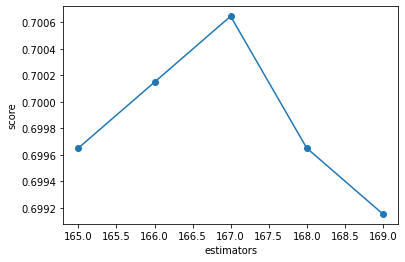

In [15]:
# plotting n_estimators

score_array=[]
for estimator_value in range(165,170,1):
    model = GradientBoostingClassifier(n_estimators=estimator_value,learning_rate=0.1,max_depth=1,random_state=0).fit(X2_train, y2_train)
    score_array.append(model.score(X2_test, y2_test))

plt.xlabel('estimators')
plt.ylabel('score')
plt.plot(np.arange(165,170,1),score_array,"o-")

In [16]:
n_estimators_gbc = GradientBoostingClassifier(n_estimators=167,learning_rate=0.1,max_depth=1,random_state=0).fit(X2_train, y2_train)
n_estimators_gbc.score(X2_test, y2_test)

0.7006464445549477

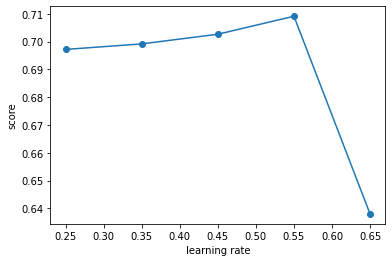

In [17]:
# plotting learning_rate

score_array=[]
for learning_value in np.arange(0.25,0.75,0.1):
    model = GradientBoostingClassifier(n_estimators=100,learning_rate=learning_value,max_depth=1,random_state=0).fit(X2_train, y2_train)
    score_array.append(model.score(X2_test, y2_test))

plt.xlabel('learning rate')
plt.ylabel('score')
plt.plot(np.arange(0.25,0.75,0.1),score_array,"o-")

In [18]:
learning_rate_gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.55,max_depth=1,random_state=0).fit(X2_train, y2_train)
learning_rate_gbc.score(X2_test, y2_test)

0.7090999502734958

In [19]:
# combination 
combination_gbc = GradientBoostingClassifier(n_estimators=167,learning_rate=0.55,max_depth=1,random_state=0).fit(X2_train, y2_train)
combination_gbc.score(X2_test, y2_test)

0.7081054201889607

In [21]:
# therefore, highest accuracy when n_estimators = 100 ; learning_rate = 0.55 (0.709)

highest = GradientBoostingClassifier(n_estimators=100,learning_rate=0.55,max_depth=1,random_state=0).fit(X2_train, y2_train)
highest.score(X2_test, y2_test)

0.7090999502734958

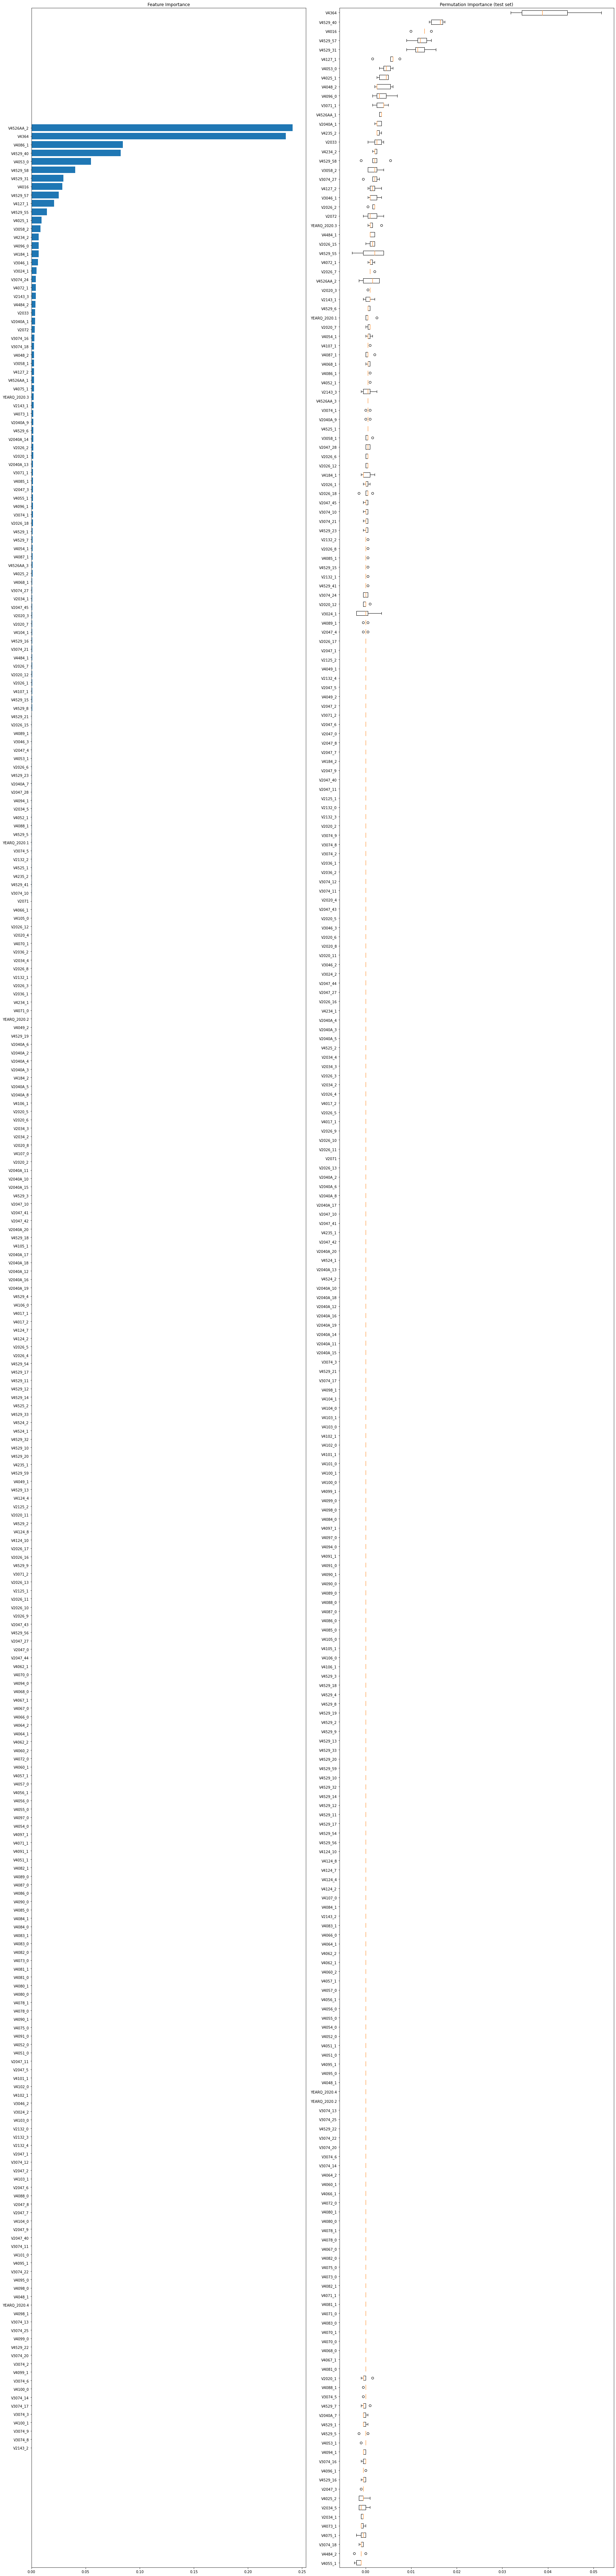

In [24]:
# finding feature importance

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

feature_importance = highest.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(24, 100))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    highest, X2_test, y2_test, n_repeats=5, random_state=42, n_jobs=1)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()